In [ ]:
import pandas as pd

df=pd.read_csv("/home/sarra/Documents/projects/projetGlsi2/resume.csv")

In [1]:
df["Category"].value_counts()


NameError: name 'df' is not defined

In [114]:
df=df.dropna()

In [115]:
df["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

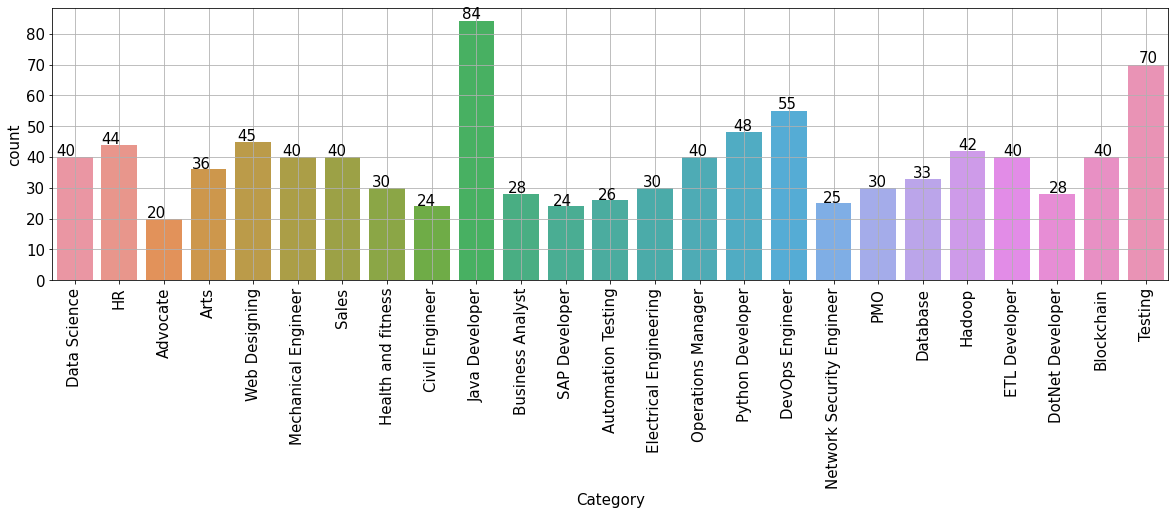

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [117]:
categoryCount=df["Category"].value_counts()
category=df["Category"].unique()

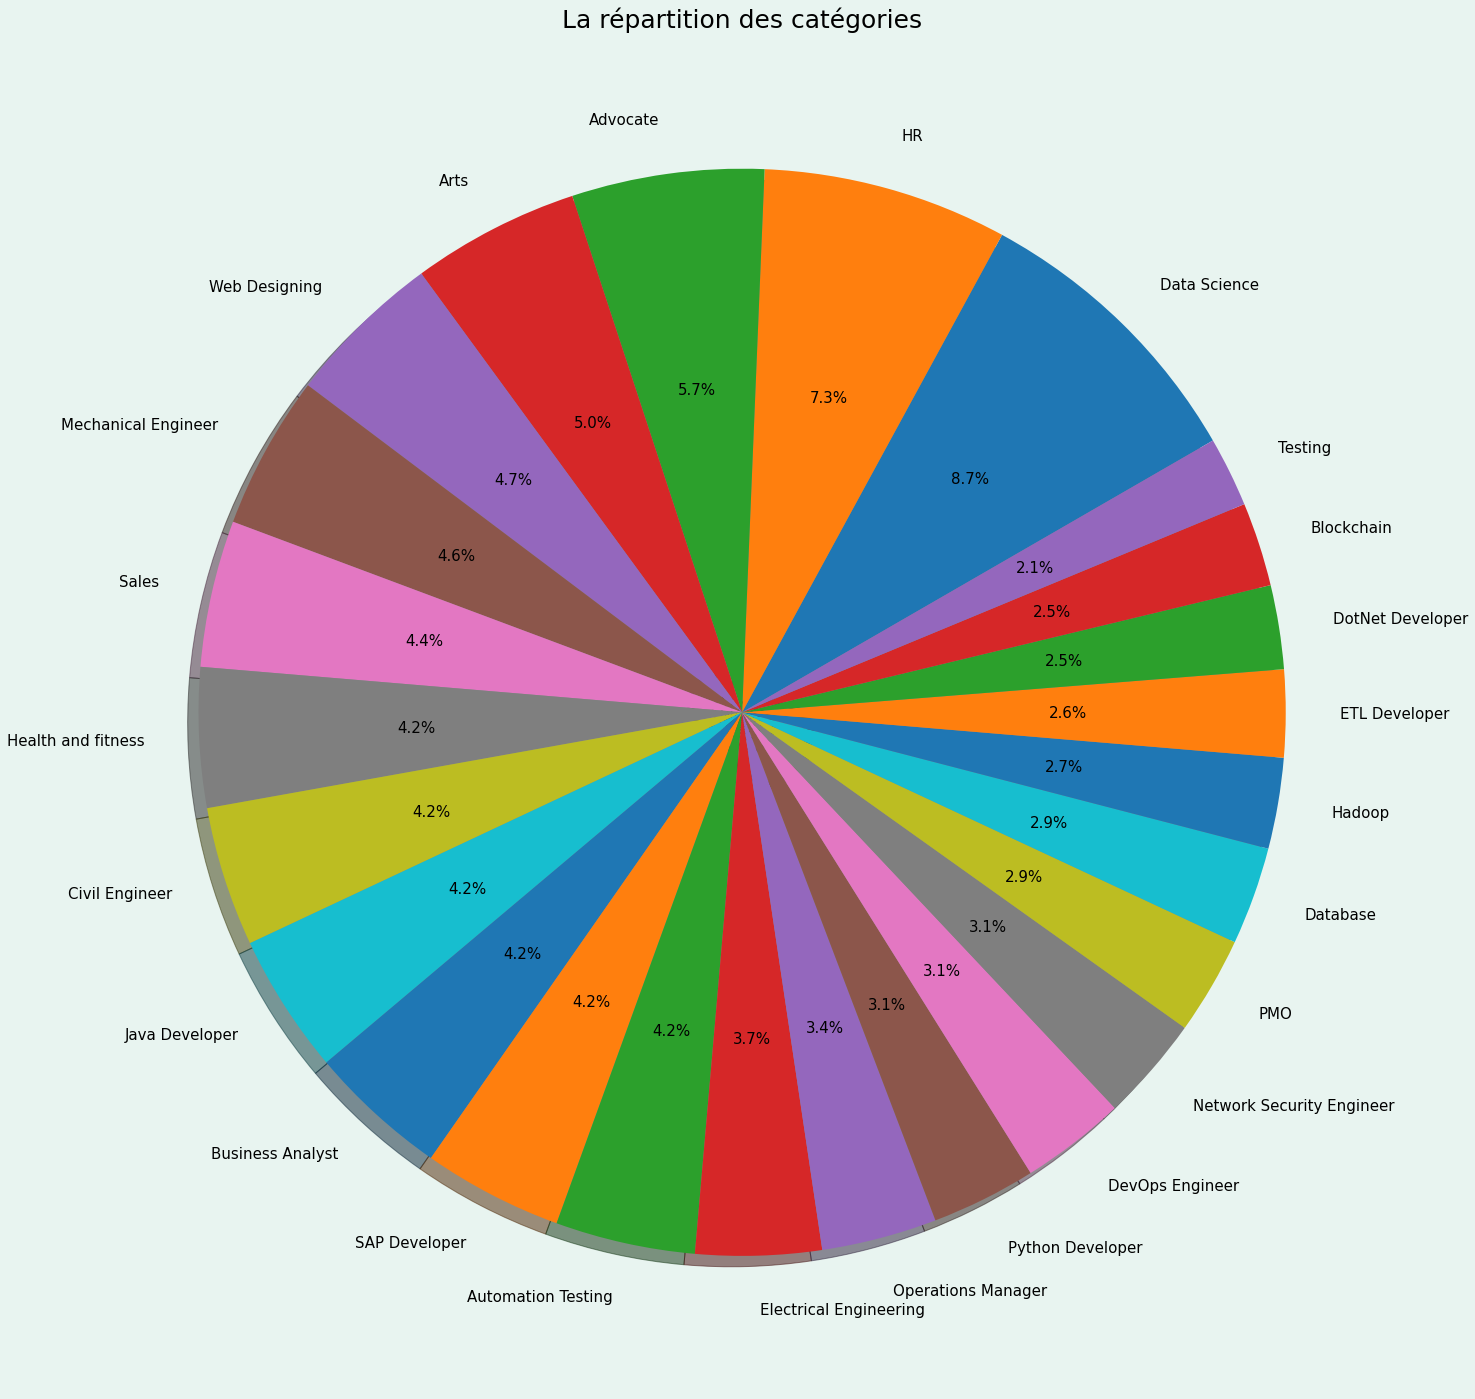

In [118]:
import matplotlib as mpl           
# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(25, 25), facecolor='#e8f4f0')
ax.pie(categoryCount, labels=category, startangle=30, autopct='%1.1f%%',shadow=True)
# Set title, its position, and font size
title = plt.title("La répartition des catégories", fontsize=25)
title.set_position([.5, 1.02])
mpl.rcParams['font.size'] = 15.0
    


In [119]:
df

,Unnamed: 0,Category,Resume
0,0,Data Science,Skills * Programming Languages: Python (pandas...
1,1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
...,...,...,...
957,957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,958,Testing,â Willingness to accept the challenges. â ...
959,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [120]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
df

,Unnamed: 0,Category,Resume,cleaned_resume
0,0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...,...
957,957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [121]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopWords_set=set(stopwords.words("english")+stopwords.words("french")+['``',"''"])
total_words=[]
sentences=df["Resume"].values

cleanedSentences=''

for i in range(len(sentences)):
    cleanedText=cleanResume(sentences[i])
    cleanedSentences+=cleanedText
    required_words=nltk.word_tokenize(cleanedText)
    for word in required_words:
        if word not in stopWords_set and word not in string.punctuation:
            total_words.append(word)


wordfreqdist=nltk.FreqDist(total_words)
most_common=wordfreqdist.most_common(50)
most_common


[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746),
 ('Pvt', 730),
 ('application', 727),
 ('System', 715),
 ('reports', 697),
 ('business', 696),
 ('India', 693),
 ('requirements', 693),
 ('I', 690),
 ('various', 688),
 ('A', 688),
 ('Data', 674),
 ('The', 672),
 ('University', 656),
 ('process', 648),
 ('Testing', 646),
 ('test', 638),
 ('Responsibilities', 637),
 ('system', 636),
 ('testing', 634),
 ('Software', 632)]

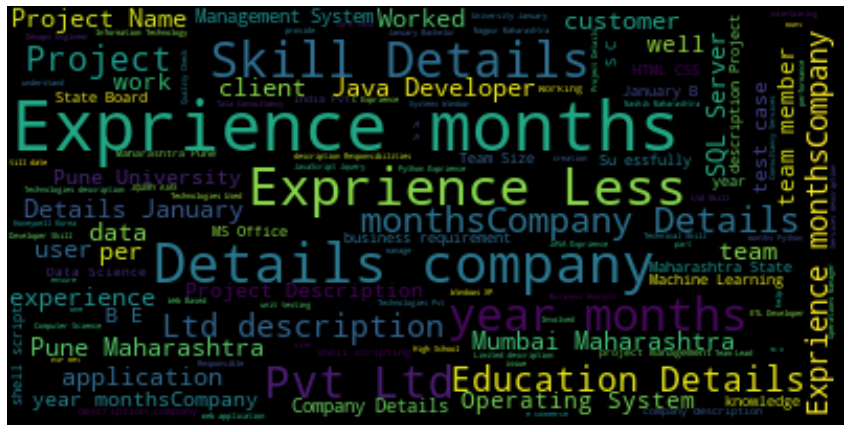

In [122]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [123]:
from sklearn.preprocessing import LabelEncoder

df_cat=pd.DataFrame({"Category":df.copy().Category})


df[["Category"]] = df[["Category"]].apply(LabelEncoder().fit_transform)

df_cat["Number_Category"]=df.Category

df_cat=df_cat.drop_duplicates()

df_cat


,Category,Number_Category
0,Data Science,6
40,HR,12
84,Advocate,0
104,Arts,1
140,Web Designing,24
185,Mechanical Engineer,16
225,Sales,22
265,Health and fitness,14
295,Civil Engineer,5
319,Java Developer,15


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

required_text=df.cleaned_resume.values
required_target=df.Category.values



word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words=["english","french"],
    max_features=1500
)

word_vectorizer.fit(required_text)

word_features=word_vectorizer.transform(required_text)


x_train,x_test,y_train,y_test=train_test_split(word_features,required_target,random_state=0,test_size=0.25)



In [125]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

clf_knn_or=OneVsRestClassifier(KNeighborsClassifier())

clf_knn_or.fit(x_train,y_train)

prediction=clf_knn_or.predict(x_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf_knn_or.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf_knn_or.score(x_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98


In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test)
print(knn_clf.score(x_train,y_train))
print(knn_clf.score(x_test,y_test))

print(knn_clf.predict(word_vectorizer.transform(np.array(['ahmed is a fat engineer']))))

0.9916782246879334
0.983402489626556
[18]


In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))

print(logreg.predict(word_vectorizer.transform(np.array(['ahmed is fat and devops aws engineer']))))

0.9986130374479889
0.9875518672199171
[8]


In [128]:
import pickle

pickle.dump(logreg, open('/home/sarra/Documents/projects/projetGlsi2/category/category_model.pkl','wb'))

In [129]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(x_train,y_train)

prediction=naive_bayes_classifier.predict(x_test)

print('Accuracy of Naive Bayes Multinominal Classifier on training set: {:.2f}'.format(naive_bayes_classifier.score(x_train, y_train)))
print('Accuracy of Naive Bayes Multinominal Classifier on test set: {:.2f}'.format(naive_bayes_classifier.score(x_test, y_test)))


naive_bayes_classifier.predict(word_vectorizer.transform(np.array(['biomedical engineer']))
)


Accuracy of Naive Bayes Multinominal Classifier on training set: 0.96
Accuracy of Naive Bayes Multinominal Classifier on test set: 0.93


array([23])

In [130]:
df.to_csv('/home/sarra/Documents/projects/projetGlsi2/cleaned_resume.csv')


In [131]:
import json

categories=df_cat.to_dict()
cat=tuple(categories["Category"].values())
code=tuple(categories["Number_Category"].values())
categories={code[i]:cat[i] for i in range(len(cat)) }

with open("/home/sarra/Documents/projects/projetGlsi2/code_category.json","w") as f:
    f.write(json.dumps(categories))
